In [1]:
from datetime import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
fpath='/Users/macbook/Desktop/archive/AEP_hourly.csv'

df=pd.read_csv(fpath)
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df.columns

Index(['Datetime', 'AEP_MW'], dtype='object')

In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [6]:
data = df.copy()

In [7]:
data["Date"] = pd.to_datetime(df["Datetime"]).dt.date
data["Time"] = pd.to_datetime(df["Datetime"]).dt.time
data["Week"] = pd.to_datetime(df["Datetime"]).dt.week
data["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
data["Month"] = pd.to_datetime(df["Datetime"]).dt.month
data["Year"] = pd.to_datetime(df["Datetime"]).dt.year
data["Hour"] = pd.to_datetime(df["Datetime"]).dt.hour

<ipython-input-7-ae0ad4392013>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data["Week"] = pd.to_datetime(df["Datetime"]).dt.week


In [8]:
data

,Datetime,AEP_MW,Date,Time,Week,Day,Month,Year,Hour
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,53,Friday,12,2004,1
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,53,Friday,12,2004,2
2,2004-12-31 03:00:00,12577.0,2004-12-31,03:00:00,53,Friday,12,2004,3
3,2004-12-31 04:00:00,12517.0,2004-12-31,04:00:00,53,Friday,12,2004,4
4,2004-12-31 05:00:00,12670.0,2004-12-31,05:00:00,53,Friday,12,2004,5
...,...,...,...,...,...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,2018-01-01,20:00:00,1,Monday,1,2018,20
121269,2018-01-01 21:00:00,20999.0,2018-01-01,21:00:00,1,Monday,1,2018,21
121270,2018-01-01 22:00:00,20820.0,2018-01-01,22:00:00,1,Monday,1,2018,22
121271,2018-01-01 23:00:00,20415.0,2018-01-01,23:00:00,1,Monday,1,2018,23


In [9]:
data.shape

(121273, 9)

In [10]:
print(data.isnull().sum().sort_values(ascending=False))

Hour        0
Year        0
Month       0
Day         0
Week        0
Time        0
Date        0
AEP_MW      0
Datetime    0
dtype: int64


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Energy Distribution Graph'}, xlabel='AEP_MW', ylabel='Density'>

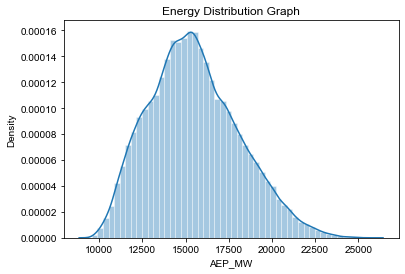

In [11]:
plt.title("Energy Distribution Graph")
sns.set_style('darkgrid')
sns.distplot(df['AEP_MW'])

In [12]:
#When was the maximum Energy Consumption and which Year
data[data["AEP_MW"] == data["AEP_MW"].max()]

,Datetime,AEP_MW,Date,Time,Week,Day,Month,Year,Hour
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00,43,Monday,10,2008,14


In [13]:
#When was the minimum Energy Consumption and which Year
data[data["AEP_MW"] == data["AEP_MW"].min()]

,Datetime,AEP_MW,Date,Time,Week,Day,Month,Year,Hour
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00,39,Sunday,10,2016,5


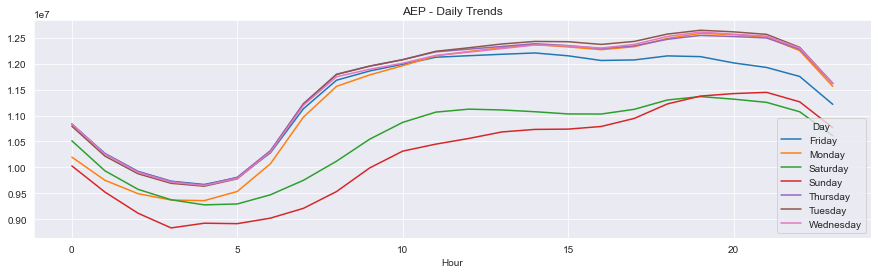

In [14]:
_ = data.pivot_table(index=data['Hour'], 
                     columns='Day', 
                     values='AEP_MW',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='AEP - Daily Trends')

* Tüm enerji tüketimlerinin toplamına baktığımızda, hafta sonlarında en düşük enerji tüketimini kaydettiğini görüyoruz.

In [15]:
data["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

<AxesSubplot:title={'center':'Relationship of Energy vs Year'}, xlabel='Year', ylabel='AEP_MW'>

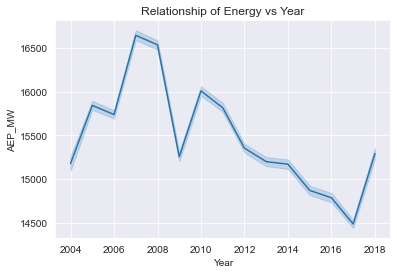

In [16]:
plt.title("Relationship of Energy vs Year")
sns.lineplot(x=data["Year"],y=data["AEP_MW"], data=data)

<AxesSubplot:title={'center':'Relationship of Energy vs Month'}, xlabel='Month', ylabel='AEP_MW'>

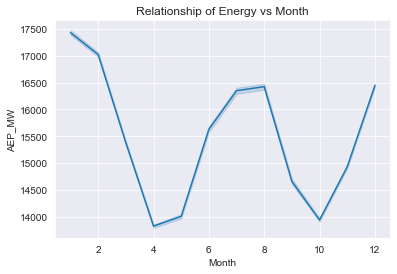

In [17]:
#relation between Energy and Month
plt.title("Relationship of Energy vs Month")
sns.lineplot(x=data["Month"],y=data["AEP_MW"], data=data)

* 2008 yılından itibaren bir kırılma yaşanmış, bu kırılma anlamlı bir kırılma çünkü seri uzun vadede eski ortalamasına dönememiş.
* Yaz ve kış aylarında enerji tüketimi artış göstermiş.
Sonbahar ve ilkbahar aylarında enerji tüketimi azalmış.

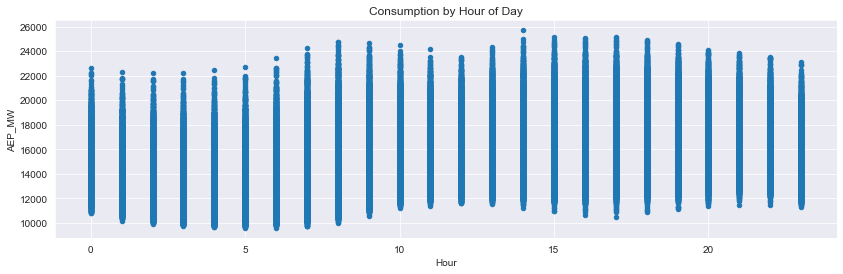

In [18]:
_ = data[['AEP_MW','Hour']].plot(x='Hour',
                                     y='AEP_MW',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day')

* Sabah saatlerinde insanlar güne hazırlanırken, işyerleri ve ofisler açıldıkça enerji tüketimi artmaya başlıyor.
* Zirve öğleden sonra meydana geliyor, ardından akşam 17.00'den itibaren hafif bir düşüş oluyor.
* Akşamları insanlar evlerine dönüp evlerini ısıtmaya ve çeşitli aktivitelerde yer almaya başladıkça enerji yükü belirli bir artış ile devam ediyor.
* Profil daha sonra gece yarısına doğru yavaşça tabana doğru eğim gösteriyor.

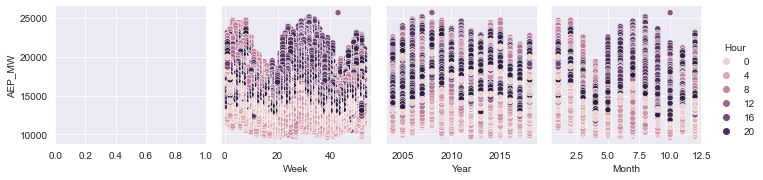

In [19]:
sns.pairplot(data,hue='Hour',x_vars=['','Week','Year','Month'],y_vars='AEP_MW',data=data)

In [20]:
data_2018=data[data['Year']== 2018]
data_2018=data_2018.set_index('Datetime')

In [21]:
data_2018

,AEP_MW,Date,Time,Week,Day,Month,Year,Hour
Datetime,,,,,,,,
2018-01-01 00:00:00,18687.0,2018-01-01,00:00:00,1,Monday,1,2018,0
2018-08-02 01:00:00,13286.0,2018-08-02,01:00:00,31,Thursday,8,2018,1
2018-08-02 02:00:00,12587.0,2018-08-02,02:00:00,31,Thursday,8,2018,2
2018-08-02 03:00:00,12296.0,2018-08-02,03:00:00,31,Thursday,8,2018,3
2018-08-02 04:00:00,12059.0,2018-08-02,04:00:00,31,Thursday,8,2018,4
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,2018-01-01,20:00:00,1,Monday,1,2018,20
2018-01-01 21:00:00,20999.0,2018-01-01,21:00:00,1,Monday,1,2018,21
2018-01-01 22:00:00,20820.0,2018-01-01,22:00:00,1,Monday,1,2018,22


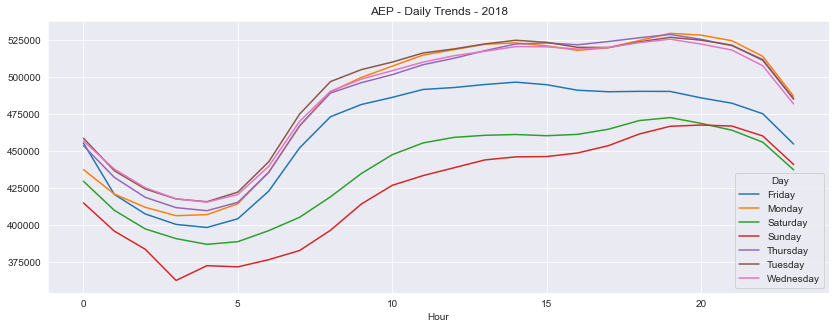

In [22]:
_ = data_2018.pivot_table(index=data_2018['Hour'], 
                     columns='Day', 
                     values='AEP_MW',
                     aggfunc='sum').plot(figsize=(14,5),
                     title='AEP - Daily Trends - 2018')

* Amaçlarımızdan biri olan 2018 yılı için tüm enerji tüketimlerinin toplamına baktığımızda, hafta sonlarında en düşük enerji tüketiminin gerçekleştiğini görüyoruz. 
* Aynı zamanda, yıllara göre dağılımını incelediğimizde de istisnalar dışında aynı davranışı gözlemlemiştik. 
* Buradan hafta sonları, tatil dönemlerinde daha az enerji harcandığını görebiliriz.

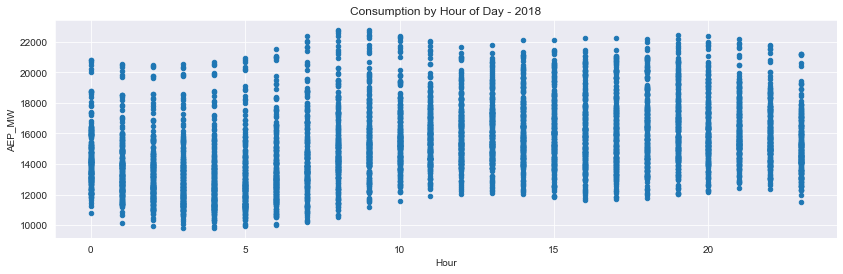

In [23]:
_ = data_2018[['AEP_MW','Hour']].plot(x='Hour',
                                     y='AEP_MW',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day - 2018')

* Amaçlarımızdan biri olan 2018 yılı için tüm enerji tüketimlerinin saatlik değişimlerine baktığımızda, en yüksek enerji tüketiminin 07:00-10:00 saatleri arasında gerçekleştiğini görüyoruz. 
* Aynı zamanda, yıllara göre dağılımını incelediğimizde de istisnalar dışında benzer davranışları gözlemlemiştik. * Buradan sabah saatlerinde insanlar güne hazırlanırken, işyerleri ve ofisler açıldıkça harcanan enerjiyi bu yıl içerisinde arttırdığını görebiliriz.

<AxesSubplot:xlabel='Month', ylabel='AEP_MW'>

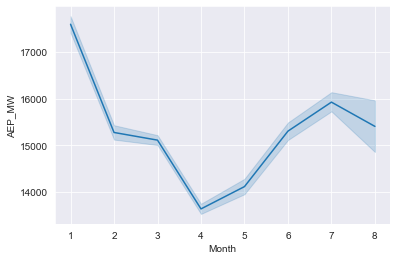

In [24]:
sns.lineplot(x=data_2018["Month"],y=data_2018["AEP_MW"], data=data_2018)

In [25]:
data_new = data_2018.iloc[:, 0:1]

In [26]:
data_new

,AEP_MW
Datetime,
2018-01-01 00:00:00,18687.0
2018-08-02 01:00:00,13286.0
2018-08-02 02:00:00,12587.0
2018-08-02 03:00:00,12296.0
2018-08-02 04:00:00,12059.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


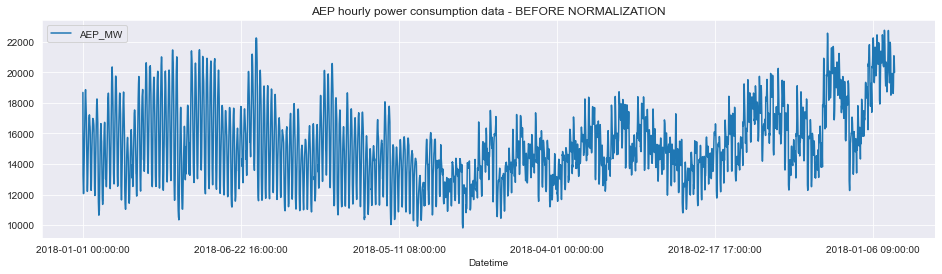

In [27]:
data_new.plot(figsize=(16,4),legend=True)
plt.title('AEP hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

* Verilerimizin normalizasyon aşamasından sonra değişkenler train ve test seti olarak ayrıldı.
* Bu ayrım yapılırken geleneksel eğitimlerde yapılan random dağılım uygulanmadı. Zaten amaç dizideki ardışıklık bilgisini de korumak olduğu için burada hedeflenen aralığı test seti (116) olarak ayrılırken kalan diğer kısmı ise training seti (5000) olarak oluşturuldu.

In [28]:
def normalize_data(df):
    scaler = MinMaxScaler()
    data_new['AEP_MW']=scaler.fit_transform(data_new['AEP_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(data_new)
df_norm.shape

<ipython-input-28-4527d33b58ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['AEP_MW']=scaler.fit_transform(data_new['AEP_MW'].values.reshape(-1,1))


(5136, 1)

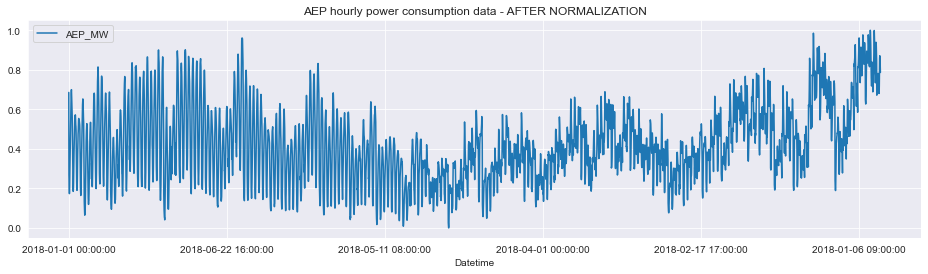

In [29]:
df_norm.plot(figsize=(16,4),legend=True)

plt.title('AEP hourly power consumption data - AFTER NORMALIZATION')
plt.show()

* Normalizasyondan sonra, grafiğin y ekseninde gözlemleyebildiğimiz güç tüketimi değerlerinin aralığı değişir.
* Görüntülenen önceki grafikte 0 - 22500 aralığındaydı.
* Artık normalizasyondan sonra y eksenindeki veri aralığının 0.0 - 1.0 olduğunu gözlemleyebiliriz.

In [30]:
def load_data(df_req, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(df_req)):
        X_train.append(df_req.iloc[i-seq_len : i, 0])
        y_train.append(df_req.iloc[i, 0])
    
    #1 last 136 days are going to be used in test
    #1son 136 gün test aşaması için kullanılacak.
    X_test = X_train[5000:]             
    y_test = y_train[5000:]
    
    #2 first 5000 days are going to be used in training
    #2 ilk 5000 gün eğitim aşaması için kullanılacak
    X_train = X_train[:5000]           
    y_train = y_train[:5000]
    
    #3 convert to numpy array
    #3 numpy dizi dönüşümü
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    #4 verilerin RNN modellerine girilmesi için yeniden şekillendirilmesi
    X_train = np.reshape(X_train, (5000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [31]:
seq_len = 20 #dizi uzunluğunu seçimi

X_train, y_train, X_test, y_test = load_data(data_new, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5000, 20, 1)
y_train.shape =  (5000,)
X_test.shape =  (116, 20, 1)
y_test.shape =  (116,)


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Dropout,SimpleRNN,LSTM

from keras.models import Sequential
lstm_model = Sequential()

lstm_model.add(LSTM(70,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(70,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(70,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20, 70)            20160     
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20, 70)            39480     
_________________________________________________________________
dropout_10 (Dropout)         (None, 20, 70)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 70)                39480     
_________________________________________________________________
dropout_11 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [45]:
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=70, batch_size=1000)

Epoch 1/70
5/5 [==============================] - 8s 525ms/step - loss: 0.0066
Epoch 2/70
5/5 [==============================] - 3s 553ms/step - loss: 0.0059
Epoch 3/70
5/5 [==============================] - 3s 509ms/step - loss: 0.0046
Epoch 4/70
5/5 [==============================] - 3s 521ms/step - loss: 0.0041
Epoch 5/70
5/5 [==============================] - 3s 648ms/step - loss: 0.0040
Epoch 6/70
5/5 [==============================] - 3s 707ms/step - loss: 0.0037
Epoch 7/70
5/5 [==============================] - 3s 645ms/step - loss: 0.0037
Epoch 8/70
5/5 [==============================] - 4s 856ms/step - loss: 0.0035
Epoch 9/70
5/5 [==============================] - 4s 781ms/step - loss: 0.0034
Epoch 10/70
5/5 [==============================] - 4s 808ms/step - loss: 0.0035
Epoch 11/70
5/5 [==============================] - 3s 605ms/step - loss: 0.0033
Epoch 12/70
5/5 [==============================] - 3s 521ms/step - loss: 0.0033
Epoch 13/70
5/5 [==============================] 

In [46]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.8447879805461163


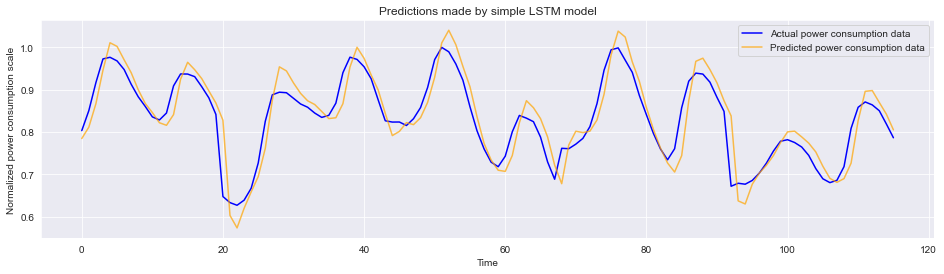

In [35]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, lstm_predictions, "Predictions made by simple LSTM model")

* Modelimizde aktivasyon fonksiyonu olarak ‘tanh’ , optimizasyon fonksiyonu olarak ‘adam’ fonksiyonu kullanılmış olup hata metriği olarak “MSE (Ortalama Kare Hatası)” tercih edilmiştir. 
* 70 adımda tamamlanan eğitim sonucunda kayıp değeri: 0.0021 civarında belirlendi. Sonrasında oluşturulan model üzerinden tahminleme işlemi yapılarak doğruluk skoru (r2): 0.84 olarak elde edildi.

In [36]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(70,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20, 70)            5040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20, 70)            9870      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 70)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 70)                9870      
_________________________________________________________________
dropout_5 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [37]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=70, batch_size=1000)

Epoch 1/70
5/5 [==============================] - 3s 175ms/step - loss: 0.5340
Epoch 2/70
5/5 [==============================] - 1s 183ms/step - loss: 0.2663
Epoch 3/70
5/5 [==============================] - 1s 177ms/step - loss: 0.2339
Epoch 4/70
5/5 [==============================] - 1s 178ms/step - loss: 0.1940
Epoch 5/70
5/5 [==============================] - 1s 177ms/step - loss: 0.1542
Epoch 6/70
5/5 [==============================] - 1s 179ms/step - loss: 0.1237
Epoch 7/70
5/5 [==============================] - 1s 180ms/step - loss: 0.1078
Epoch 8/70
5/5 [==============================] - 1s 179ms/step - loss: 0.0922
Epoch 9/70
5/5 [==============================] - 1s 176ms/step - loss: 0.0829
Epoch 10/70
5/5 [==============================] - 1s 176ms/step - loss: 0.0724
Epoch 11/70
5/5 [==============================] - 1s 208ms/step - loss: 0.0629
Epoch 12/70
5/5 [==============================] - 1s 179ms/step - loss: 0.0555
Epoch 13/70
5/5 [==============================] 

In [38]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  0.8376926764498871


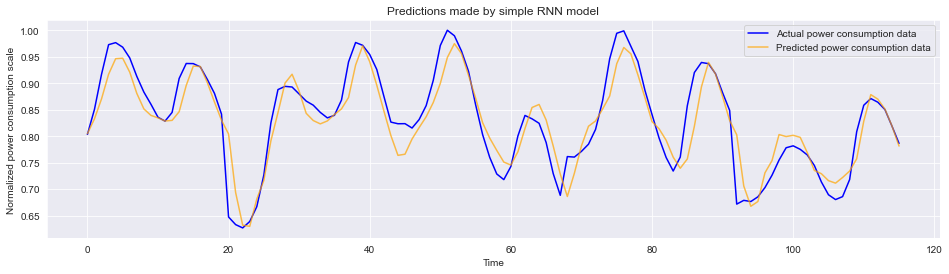

In [39]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

* Modelimizde aktivasyon fonksiyonu olarak ‘tanh’, optimizasyon fonksiyonu olarak ‘adam’ fonksiyonu kullanılmış olup hata metriği olarak “MSE (Ortalama Kare Hatası)” tercih edilmiştir. 
* 70 adımda tamamlanan eğitim sonucunda kayıp değeri: 0.0075 civarında belirlendi. Sonrasında oluşturulan model üzerinden tahminleme işlemi yapılarak doğruluk skoru(r2): 0.83 olarak elde edildi.

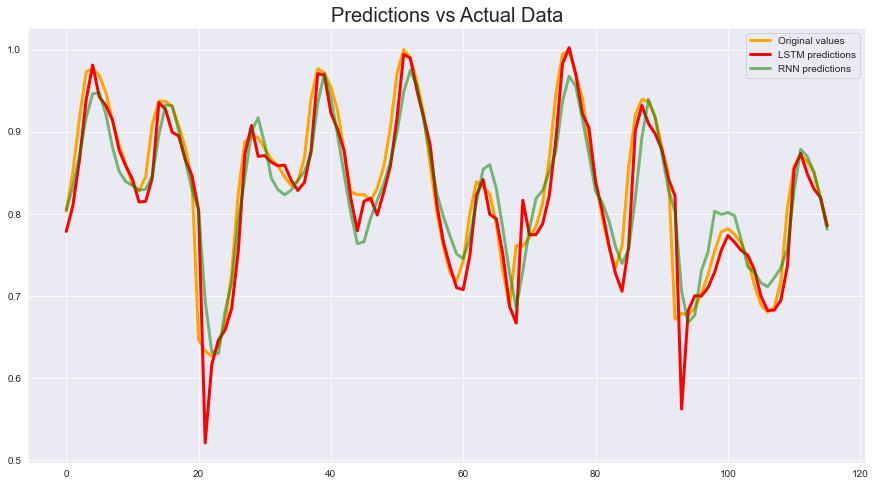

In [47]:
plt.figure(figsize=(15,8))

plt.plot(y_test, c="orange", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="red", linewidth=3, label="LSTM predictions")
plt.plot(rnn_predictions, alpha=0.5, c="green", linewidth=3, label="RNN predictions")
plt.legend()
plt.title("Predictions vs Actual Data", fontsize=20)
plt.show()

* LSTM ile tahminlenen değerlerin gerçek değerlere daha yakın olduğu gözlenmiştir. 
* Aynı şekilde RNN’in de yakınlığı saptanmış fakat LSTM’in daha iyi sonuç verdiği kanıtlanmıştır.